# WeatherPy

---

## Purpose

The primary aim of this code is to provide insights into how weather parameters change with latitude and to identify any significant geographical weather patterns. This analysis can help in understanding global climate behavior, which is useful for educational purposes, research, or informing climate-related decision-making.


## Process Summary

### Data Collection:

The code retrieves weather data for numerous cities across different latitudes and longitudes. This is typically done via an API, such as the OpenWeatherMap API, which provides current weather statistics for any given location.

### Data Preparation:

After collecting the data, it is organized into a DataFrame to facilitate analysis. This includes cleaning the data by removing or correcting any anomalies or missing values.

### Visualization:

Scatter plots are generated to visually assess the relationships between latitude and each of the weather parameters. These plots help to identify any trends, such as temperature changes relative to the equator or how cloudiness varies with latitude.

### Statistical Analysis:

Linear regression is performed on each relationship to quantify the extent to which latitude can predict various weather conditions. This includes calculating the correlation coefficient to understand the strength and direction of the relationship, the coefficient of determination to see how much variance in the weather variable is explained by latitude, and p-values to determine the statistical significance of the findings.

### Output:

The results of the analysis, including both the visualizations and the regression outputs, are presented in a structured format. This may include saving plots as images or directly embedding them in the output file.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 584


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
import requests
import time

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Ensure weather_api_key is defined
# weather_api_key = "YOUR_API_KEY"  # Uncomment and replace with your actual API key
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city

    # Log the URL, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Request weather data
        response = requests.get(city_url)

        # Check if the response was successful
        if response.status_code == 200:
            city_weather = response.json()

            # Ensure the response contains the required keys
            if all(key in city_weather for key in ["coord", "main", "wind", "clouds", "sys"]):
                # Append the City information into city_data list
                city_data.append({
                    "City": city,
                    "Lat": city_weather['coord']['lat'],
                    "Lng": city_weather['coord']['lon'],
                    "Max Temp": city_weather['main']['temp_max'],
                    "Humidity": city_weather['main']['humidity'],
                    "Cloudiness": city_weather['clouds']['all'],
                    "Wind Speed": city_weather['wind']['speed'],
                    "Country": city_weather['sys']['country'],
                    "Date": city_weather['dt']
                })
            else:
                print(f"Incomplete data for city: {city}, skipping...")
        else:
            print(f"Failed to retrieve data for city: {city}, HTTP Status Code: {response.status_code}")

    except requests.exceptions.HTTPError as http_err:
        print(f"HTTP error occurred: {http_err} - Skipping {city}")
    except requests.exceptions.RequestException as req_err:
        print(f"Request exception: {req_err} - Skipping {city}")
    except KeyError as key_err:
        print(f"Key error: {key_err} - Skipping {city}")
    except Exception as e:
        print(f"An error occurred: {e} - Skipping {city}")

    # Pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | badger
Processing Record 2 of Set 1 | kirakira
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | iqaluit
Processing Record 6 of Set 1 | chonchi
Processing Record 7 of Set 1 | agat village
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | isafjordur
Processing Record 10 of Set 1 | la almunia de dona godina
Processing Record 11 of Set 1 | rancho palos verdes
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | san antonio de pale
Processing Record 15 of Set 1 | levelland
Processing Record 16 of Set 1 | sanctuary point
Processing Record 17 of Set 1 | puerto pilon
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | aykhal
Processing Record 20 of Set 1 | maiwut
Failed to retrieve data for city: maiwut, HTTP Status Code: 404
Processing Record

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,badger,64.8000,-147.5333,16.15,72,0,2.06,US,1722797046
1,kirakira,-10.4544,161.9205,26.00,87,100,5.23,SB,1722797547
2,waitangi,-43.9535,-176.5597,6.01,89,100,6.61,NZ,1722796967
3,bethel,41.3712,-73.4140,29.00,74,40,3.60,US,1722796945
4,iqaluit,63.7506,-68.5145,5.85,93,100,2.06,CA,1722797550


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,badger,64.8000,-147.5333,16.15,72,0,2.06,US,1722797046
1,kirakira,-10.4544,161.9205,26.00,87,100,5.23,SB,1722797547
2,waitangi,-43.9535,-176.5597,6.01,89,100,6.61,NZ,1722796967
3,bethel,41.3712,-73.4140,29.00,74,40,3.60,US,1722796945
4,iqaluit,63.7506,-68.5145,5.85,93,100,2.06,CA,1722797550


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

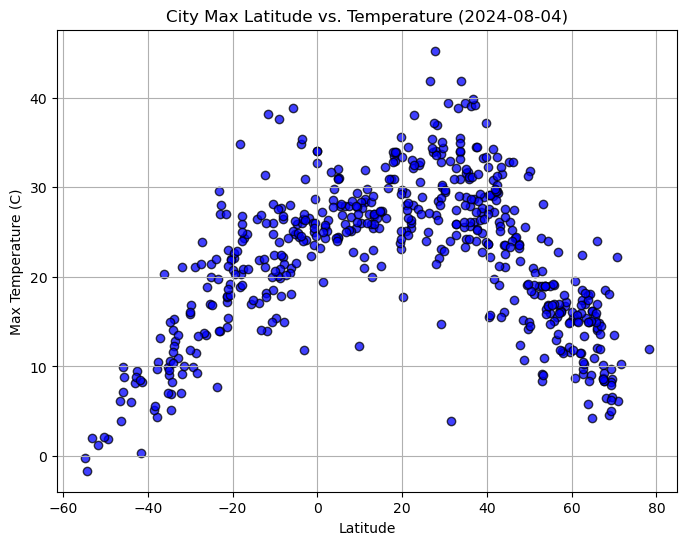

In [23]:
%matplotlib inline

# Create a scatter plot for Latitude vs. Max Temperature
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], color='blue', edgecolor='black', marker='o', alpha=0.75)

# Add Plot title, labels, and properties
plt.title('City Max Latitude vs. Temperature (2024-08-04)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

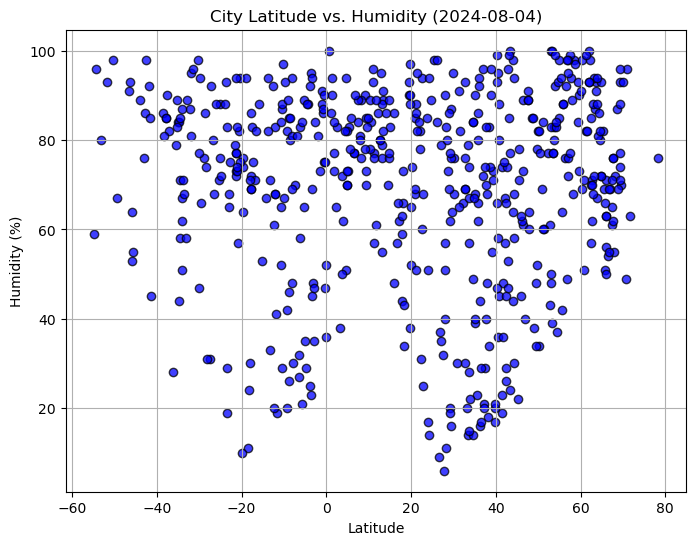

In [24]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], color='blue', edgecolor='black', marker='o', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2024-08-04)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

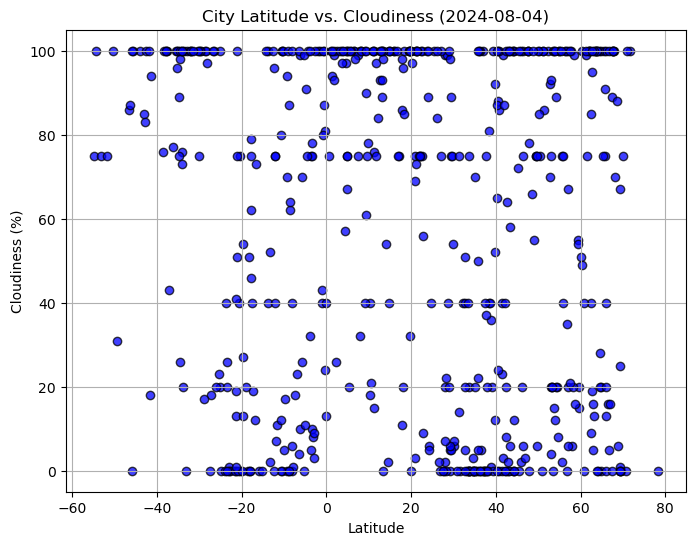

In [25]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], color='blue', edgecolor='black', marker='o', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2024-08-04)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

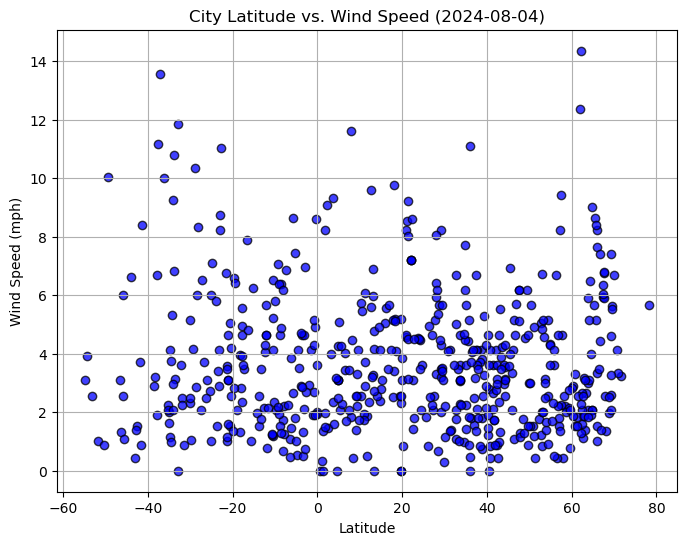

In [26]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], color='blue', edgecolor='black', marker='o', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2024-08-04)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    r_squared = rvalue ** 2

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The Correlation Coefficient is: {rvalue}")
    print(f"The Coefficient of Determination: {r_squared}")
    print(f"The p-value is: {pvalue}")
    print(f"The standard error is: {stderr}")
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,badger,64.8000,-147.5333,16.15,72,0,2.06,US,1722797046
3,bethel,41.3712,-73.4140,29.00,74,40,3.60,US,1722796945
4,iqaluit,63.7506,-68.5145,5.85,93,100,2.06,CA,1722797550
6,agat village,13.3886,144.6585,27.06,89,0,0.00,GU,1722797552
7,albany,42.6001,-73.9662,29.32,74,64,0.45,US,1722797036


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kirakira,-10.4544,161.9205,26.00,87,100,5.23,SB,1722797547
2,waitangi,-43.9535,-176.5597,6.01,89,100,6.61,NZ,1722796967
5,chonchi,-42.6128,-73.8092,9.51,98,100,1.52,CL,1722797166
11,ushuaia,-54.8000,-68.3000,-0.19,59,75,3.09,AR,1722797018
13,san antonio de pale,-1.4014,5.6325,22.32,73,100,4.14,GQ,1722797518


###  Temperature vs. Latitude Linear Regression Plot

The Correlation Coefficient is: -0.6524526189544492
The Coefficient of Determination: 0.42569441998051966
The p-value is: 4.6761753608287784e-48
The standard error is: 0.015913594883163667


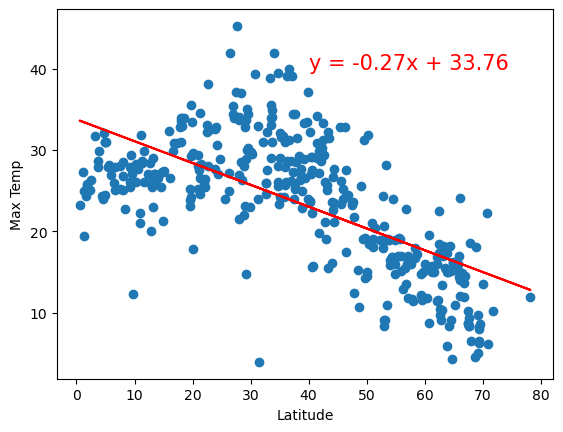

In [20]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (40, 40))


The Correlation Coefficient is: 0.8137763932865792
The Coefficient of Determination: 0.6622320182705133
The p-value is: 4.189572744458594e-43
The standard error is: 0.026125784468466105


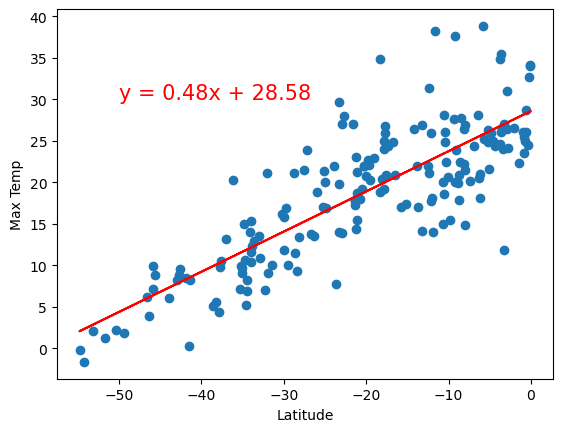

In [21]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-50, 30))

The linear regression metrics for the relationship between maximum temperature and latitude in both the Northern and Southern Hemispheres reveal distinct patterns. For the Northern Hemisphere, the correlation coefficient of -0.652 indicates a moderate to strong negative linear relationship, meaning that as latitude increases (moving further from the equator), maximum temperatures tend to decrease. This relationship explains about 42.57% of the variance in maximum temperature, as indicated by the coefficient of determination. The extremely small p-value (4.68e-48) signifies that this negative correlation is statistically significant, and the relatively low standard error suggests that the estimates of the slope are precise.

In contrast, the Southern Hemisphere shows a stronger positive linear correlation (r = 0.814) between these variables, implying that as one moves closer to the equator (latitude increases from negative to zero), the maximum temperatures tend to rise. This model is quite robust, explaining approximately 66.22% of the variance in maximum temperatures, supported by a similarly tiny p-value (4.19e-43), indicating a very strong statistical significance. The higher standard error, compared to the Northern Hemisphere, suggests slightly less precision in the slope estimates but still maintains a reliable model.

These analyses demonstrate typical climatological patterns: temperatures decrease with increasing latitude from the equator in the Northern Hemisphere and increase as one approaches the equator from the Southern Hemisphere. The strong statistical significance in both hemispheres underscores the reliability of latitude as a predictor of maximum temperature across different parts of the world.


### Humidity vs. Latitude Linear Regression Plot

The Correlation Coefficient is: 0.032543901247288176
The Coefficient of Determination: 0.001059105508393245
The p-value is: 0.5243529997571321
The standard error is: 0.05824147677239237


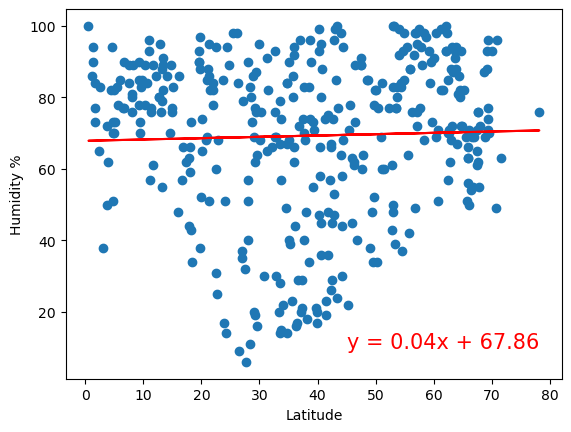

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity %', (45, 10))

The Correlation Coefficient is: -0.22066870744886705
The Coefficient of Determination: 0.04869467844715367
The p-value is: 0.003162579962932292
The standard error is: 0.11702420185294911


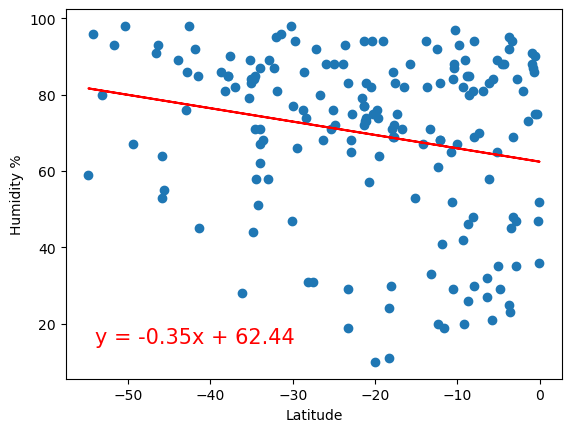

In [27]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity %', (-54, 15))

The linear regression analysis for the relationship between humidity percentage and latitude in the Northern and Southern Hemispheres indicates differing degrees of correlation and statistical significance. In the Northern Hemisphere, the correlation coefficient of 0.033 suggests a very weak positive linear relationship between humidity and latitude, implying that there is almost no linear association between these variables. The coefficient of determination (r²) is approximately 0.0011, indicating that less than 0.11% of the variability in humidity can be explained by latitude. The high p-value of 0.524 implies that this result is not statistically significant, and the relatively large standard error reflects imprecision in the estimate of the relationship.

In the Southern Hemisphere, the correlation coefficient is -0.221, indicating a weak negative linear relationship between humidity and latitude, suggesting that humidity slightly decreases as one moves closer to the equator (latitude increases from negative to zero). Here, the coefficient of determination is approximately 0.049, meaning that about 4.87% of the variability in humidity is explained by latitude. The p-value of 0.003 indicates statistical significance, suggesting that despite the weak relationship, the correlation observed is unlikely to be due to chance. However, the standard error is larger compared to the Northern Hemisphere, indicating more variability in the data.

Overall, these analyses show that there is a weak and insignificant relationship between humidity and latitude in the Northern Hemisphere, while there is a slightly stronger but still weak and significant negative relationship in the Southern Hemisphere. This suggests that other factors, beyond latitude, play a more significant role in influencing humidity levels in both hemispheres.


### Cloudiness vs. Latitude Linear Regression Plot

The Correlation Coefficient is: -0.19137465233667328
The Coefficient of Determination: 0.036624257556982565
The p-value is: 0.00015821589221120708
The standard error is: 0.10509571636630534


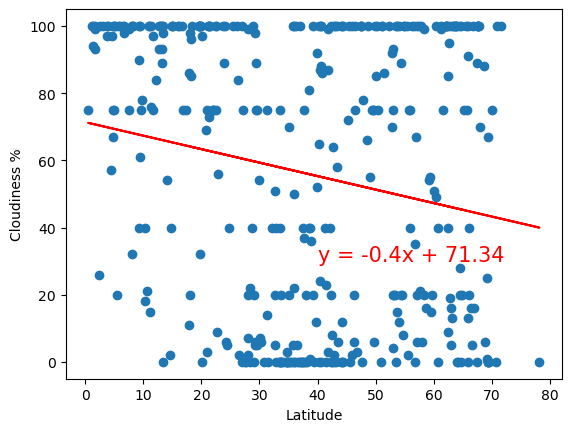

In [30]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness %', (40, 30))

The Correlation Coefficient is: -0.2745416952688506
The Coefficient of Determination: 0.07537314244109442
The p-value is: 0.00021732757220110997
The standard error is: 0.20878454061458734


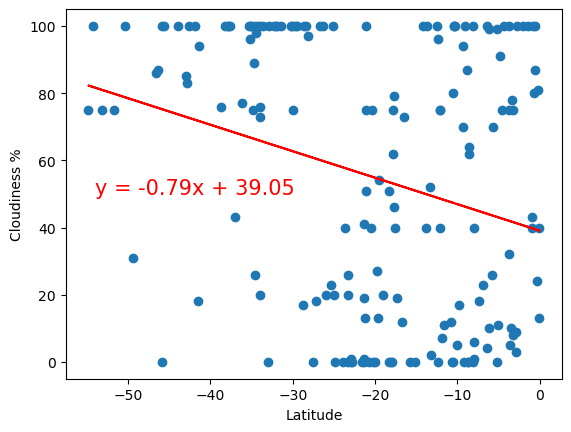

In [34]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness %', (-54, 50))

The linear regression analysis for the relationship between cloudiness and latitude in the Northern and Southern Hemispheres reveals weak negative correlations, both statistically significant. In the Northern Hemisphere, the correlation coefficient of -0.191 indicates a weak negative linear relationship, suggesting that as latitude increases, cloudiness slightly decreases. The coefficient of determination (r²) is approximately 0.0366, indicating that only 3.66% of the variance in cloudiness can be explained by latitude. Despite the weakness of this relationship, the p-value of 0.000158 suggests that the relationship is statistically significant, meaning the observed correlation is unlikely to have occurred by chance. The standard error is relatively high, indicating variability in the data points around the regression line.

In the Southern Hemisphere, the correlation coefficient of -0.275 indicates a slightly stronger negative linear relationship compared to the Northern Hemisphere. This implies that cloudiness tends to decrease as latitude moves closer to the equator (latitude increases from negative to zero). The coefficient of determination (r²) is approximately 0.0754, meaning that about 7.54% of the variance in cloudiness is explained by latitude. The p-value of 0.000217 confirms the statistical significance of this correlation, while the higher standard error compared to the Northern Hemisphere suggests greater variability in the data.

Overall, these analyses indicate that while there is a statistically significant negative correlation between cloudiness and latitude in both hemispheres, the relationships are weak. This suggests that factors other than latitude are likely more influential in determining cloudiness levels in both hemispheres.


### Wind Speed vs. Latitude Linear Regression Plot

The Correlation Coefficient is: 0.012783320710085219
The Coefficient of Determination: 0.00016341328837689366
The p-value is: 0.8025707303941696
The standard error is: 0.005847094084552995


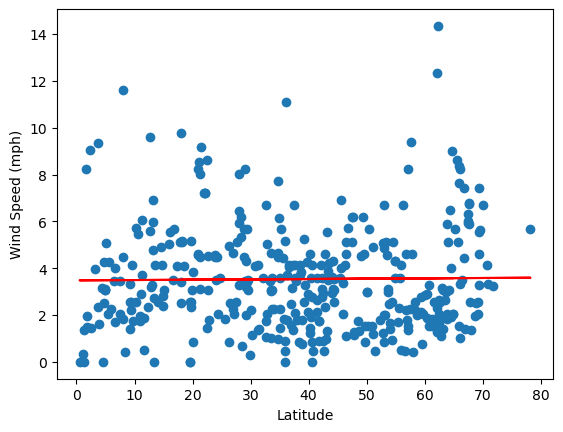

In [41]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed (mph)', (40, 25))

The Correlation Coefficient is: -0.09847001455643113
The Coefficient of Determination: 0.009696343766743758
The p-value is: 0.19225142823365432
The standard error is: 0.014123398660271501


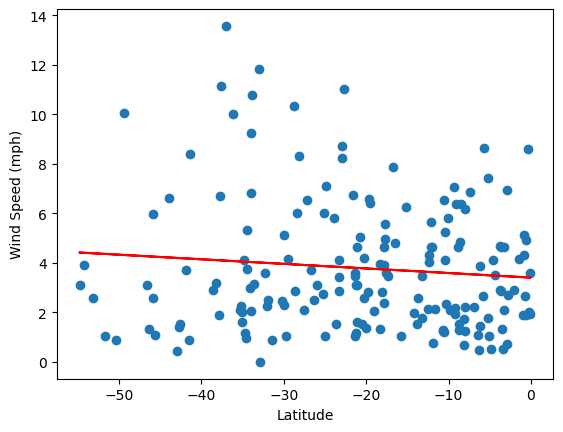

In [42]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed (mph)', (-54, 20))

The linear regression analysis examining the relationship between wind speed and latitude in both the Northern and Southern Hemispheres indicates very weak correlations, with neither relationship reaching statistical significance. In the Northern Hemisphere, the correlation coefficient is 0.013, suggesting an almost negligible positive linear relationship between wind speed and latitude. The coefficient of determination (r²) is approximately 0.00016, meaning that only 0.016% of the variance in wind speed can be explained by latitude, indicating an extremely weak relationship. The high p-value of 0.803 further confirms that this relationship is not statistically significant, and the standard error reflects considerable variability in the data.

In the Southern Hemisphere, the correlation coefficient is -0.098, indicating a weak negative linear relationship between wind speed and latitude. The coefficient of determination is approximately 0.0097, suggesting that less than 1% of the variance in wind speed is explained by latitude. The p-value of 0.192 indicates that this relationship is also not statistically significant, and the standard error reflects a moderate level of variability in the data.

Overall, these results suggest that latitude is not a significant predictor of wind speed in either hemisphere, with other factors likely having a greater impact on wind speed variations across different latitudes. The lack of statistical significance in both cases reinforces the idea that wind speed is influenced by more complex factors beyond simple geographic latitude.
